___
# PROJETO 3

## GRUPO:
### Bruno Xavier Gomes

_________
### Teorema do Limite Central

O Teorema do Limite Central (TLC) afirma que a distribuição das médias amostrais (X̅) de uma variável aleatória (X1,...,Xn) com média μ e variância $\sigma^2$, quando tiver o tamanho da amostra (n) tendento ao infinito, se comporta uma distribuição Normal. Ou seja, quando n tende ao infinito, X̅~N$(\mu; \frac{\sigma^2}{n})$

X̅, chamado de média amostral, é uma função muito utilizada na estatística para ajudar na estimativa de parâmetros populacionais que não conhecemos, como por exemplo, a média populacional (μ). A média amostral pode ser calculada pela fórmula:  X̅ = $\frac{1}{n}\sum X$
______

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import math

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


___
## Estudo da Distribuição da Média Amostral  $\bar{X}$  via SIMULAÇÃO

Para podermos enter o Teorema do Limite Central será feita uma simulação para visualizar graficamente a distribuição da média amostral e análisar os dados obtidos, como o valor médio e a variância destas médias.

In [2]:
dataG = stats.gamma.rvs(4, size = 1000000)
dfGamma = pd.DataFrame(dataG)

In [3]:
medG, varG = dataG.mean(), dataG.var()
print('Média:', medG, '\nVariância:', varG)

Média: 3.99750466499 
Variância: 4.00608444354


In [4]:
lista = [2, 4, 20, 50]
m2, m4, m20, m50, l3, l15 = [], [], [], [], [], []

for e in lista: 
    for i in range(10000):
        x = np.random.choice(dataG, e)
        media = x.mean()
            
        if e == 2:
            m2.append(media)
        elif e == 4:
            m4.append(media)
        elif e == 20:
            m20.append(media)
        elif e == 50:
            m50.append(media)
            l3.append(x[2]) # para a parte da amostra aleatória
            l15.append(x[14]) # para a parte da amostra aleatória

In [5]:
df2, df4, df20, df50 = sorted(m2), sorted(m4), sorted(m20), sorted(m50)
df2, df4, df20, df50 = pd.Series(df2), pd.Series(df4), pd.Series(df20), pd.Series(df50)

mu2, mu4, mu20, mu50 = df2.mean(), df4.mean(), df20.mean(), df50.mean()
var2, var4, var20, var50 = df2.var(), df4.var(), df20.var(), df50.var()

In [6]:
print('Média:', dataG.mean(), '\nVariância:', dataG.var())
print('\nMédia amostral para n=2:', mu2, '\nVariância amostral para n=2:', var2)
print('\nMédia amostral para n=4:', mu4, '\nVariância amostral para n=4:', var4)
print('\nMédia amostral para n=20:', mu20, '\nVariância amostral para n=20:', var20)
print('\nMédia amostral para n=50:', mu50, '\nVariância amostral para n=50:', var50)

Média: 3.99750466499 
Variância: 4.00608444354

Média amostral para n=2: 3.9566986882460142 
Variância amostral para n=2: 2.033256591355417

Média amostral para n=4: 3.993634099261985 
Variância amostral para n=4: 0.98475102462333

Média amostral para n=20: 3.9977851860655043 
Variância amostral para n=20: 0.1974138231364247

Média amostral para n=50: 4.000259534946132 
Variância amostral para n=50: 0.07843853821754916


Ao compararmos os dados amostrais com os populacionais podemos notar que a média é muito parecida em todos os casos, porém a variância diminui quando n aumenta. Com isso podemos perceber que quando n tende ao infinito a média iria se igualar com a poupulacional enquanto o variância tenderia a zero, isso acontece, pois quando n tiver um valor parecido com o tamanho da população, teremos uma distribuição que nos dará certeza da média populacional.

In [7]:
k = math.sqrt(200)

a2, a4, a20, a50 = (max(m2) - min(m2))/k, (max(m4) - min(m4))/k, (max(m20) - min(m20))/k, (max(m50) - min(m50))/k
f2, f4, f20, f50 = (np.arange(min(m2), max(m2), a2), np.arange(min(m4), max(m4), a4), 
                    np.arange(min(m20), max(m20), a20), np.arange(min(m50), max(m50), a50))

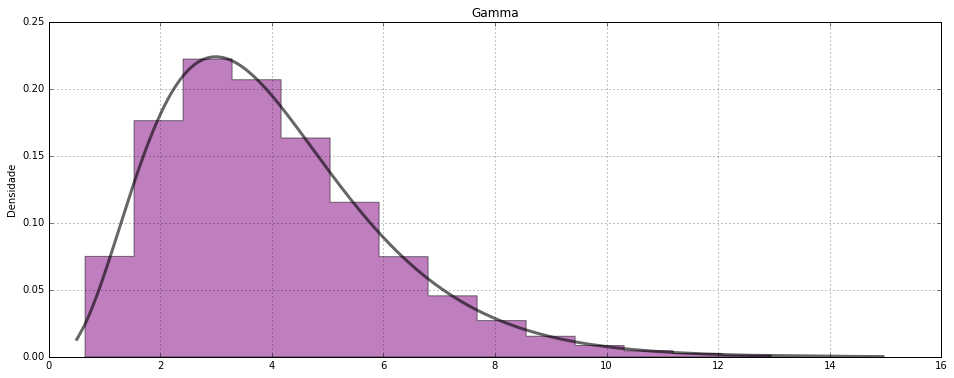

In [8]:
aG, lG, sG = stats.gamma.fit(dfGamma)
xG = sorted(stats.gamma.rvs(aG, size = 1000, loc = lG, scale = sG))

plot = dfGamma.plot.hist(bins = f2, title = 'Gamma', alpha = 0.5, color = 'purple', normed = 1, histtype = 'stepfilled', 
                         grid = True, figsize = (16, 6), legend = False)
plt.plot(xG, stats.gamma.pdf(xG, a = aG, loc = lG, scale = sG), lw = 3, alpha = 0.6, color = 'Black')
plt.ylabel('Densidade')

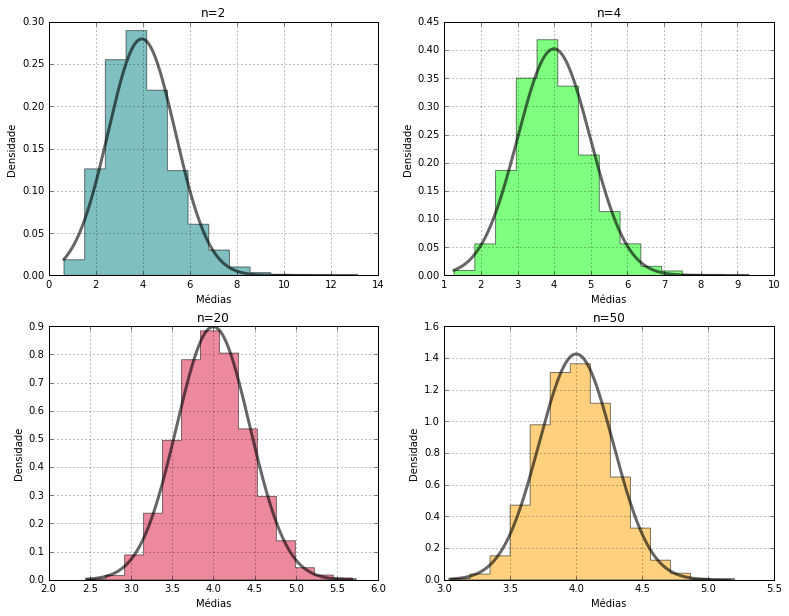

In [9]:
fig = plt.figure(figsize = (13, 10))

n, m, v, c, t, f = ([df2, df4, df20, df50], [mu2, mu4, mu20, mu50], [var2, var4, var20, var50], 
                    ['teal', 'lime', 'crimson', 'orange'], ['n=2', 'n=4', 'n=20', 'n=50'], [f2, f4, f20, f50])

for i in range(len(n)):
    plt.subplot(221 + i)
    plot = n[i].plot.hist(bins = f[i], title = t[i], alpha = 0.5, color = c[i], normed = 1, histtype = 'stepfilled', 
                          grid = True)
    plt.plot(n[i], stats.norm.pdf(n[i], loc = m[i], scale = math.sqrt(v[i])), lw = 3, alpha = 0.6, color = 'black')
    plt.xlabel('Médias')
    plt.ylabel('Densidade')

Após plotar os gráficos das distribuições das médias amostrias para os diferentes valores de n, percebemos que quanto maior for o tamanho amostral, mais a distribuição se comporta como uma Normal. Isso pode ser melhor observado nos gráficos, pois sobre os dados foi plotado uma curva Normal feita a partir dos valores obtidos de cada distribuição, e podemos perceber que esta curva se encaixa melhor nas distribuições na medida em que o n cresce.

### Amostra Aleatória

Para montar a amostra aleatória foram criadas duas listas, a x3 com todos os terceiros e x15 com todos os décimos quintos valores das médias amostrais quando n=50 .

Como x3 e x15 são amostras aleatórias, tiradas de valores aleatórios, é esperado que elas tenham a mesma distribuição, que no caso desse exemplo é a Gamma.

In [12]:
df3, df15 = sorted(l3), sorted(l15)
df3, df15 = pd.Series(df3), pd.Series(df15)

mu3, mu15, var3, var15 = df3.mean(), df15.mean(), df3.var(), df15.var()
h3, h15 = (max(l3)-min(l3))/k, (max(l15)-min(l15))/k
f3, f15 = np.arange(min(l3), max(l3), h3), np.arange(min(l15), max(l15), h15)

In [13]:
a3, l3, s3 = stats.gamma.fit(df3)
a15, l15, s15 = stats.gamma.fit(df15)

x3 = sorted(stats.gamma.rvs(a3, size = 1000, loc = l3, scale = s3))
x15 = sorted(stats.gamma.rvs(a15, size = 1000, loc = l15, scale = s15))

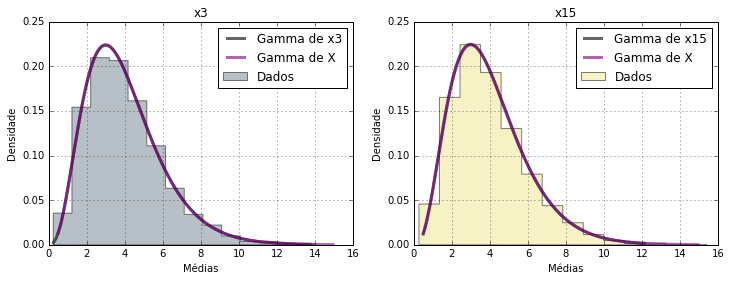

In [14]:
fig = plt.figure(figsize = (12, 4))

n, a, l, c, t, s, x, f, p = ([df3, df15], [a3, a15], [l3, l15], ['slategrey', 'khaki'], ['x3', 'x15'], [s3, s15], [x3, x15],
                             [f3, f15], ['Gamma de x3', 'Gamma de x15'])
for i in range(len(n)):
    plt.subplot(121 + i)
    plot = n[i].plot.hist(bins = f[i], title = t[i], alpha = 0.5, color = c[i], normed = 1, histtype = 'stepfilled', 
                          grid = True)
    plt.plot(x[i], stats.gamma.pdf(x[i], a = a[i], loc = l[i], scale = s[i]), lw = 3, alpha = 0.6, color = 'Black')
    plt.plot(xG, stats.gamma.pdf(xG, a = aG, loc = lG, scale = sG), lw = 3, alpha = 0.6, color = 'Purple')
    plt.xlabel('Médias')
    plt.ylabel('Densidade')
    plt.ylim(0, 0.25)
    plt.legend((p[i], 'Gamma de X', 'Dados'), loc = 'upper right')

In [15]:
cor = df3.corr(df15)
print('A correlação entre df3 e df15 é de:', cor)

A correlação entre df3 e df15 é de: 0.999748881487


A distribuição de x3 e x15 são muito parecidas com a de X, podemos perceber isso graficamente, pois foram plotados duas curvas Gamma em cada gráfico, uma com a distribuição de X e a outra com a de x3 ou x15 e ambas as curvas ficam uma em cima da outra, mostrando que são praticamente iguais.

___
## Estudo da Distribuição de  $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$  e de $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ via SIMULAÇÃO

Para podermos entender melhor a distribuição da padronização da média amostral considerando o desvio padrão populacional e a distribuição da padronização considerando o desvio padrão amostral será plotado dois histogramas para cada valor de n, um com 10.000 valores de z = $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$  e o outro com 10.000 valores de t = $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$.

In [16]:
dataN = stats.norm.rvs(loc = 10, scale = 2, size = 1000000) # mu = 10, var = 4
dfNorm = pd.DataFrame(dataN)

In [17]:
mN, vN, dpN = dataN.mean(), dataN.var(), math.sqrt(dataN.var())
print('Média:', mN, '\nVariância:', vN)

Média: 9.99926067236 
Variância: 3.99079324398


In [18]:
lista = [4, 20, 50, 300]
md4, md20, md50, md300, l_dp4, l_dp20, l_dp50, l_dp300 = [], [], [], [], [], [], [], []
l_z4, l_z20, l_z50, l_z300, l_t4, l_t20, l_t50, l_t300 = [], [], [], [], [], [], [], []

for e in lista: 
    for i in range(10000):
        x = np.random.choice(dataN, e)
        media = x.mean()
        var = x.var()
            
        if e == 4:
            md4.append(media)
            l_dp4.append(math.sqrt(var))
            l_z4.append(((media - mN)/(dpN/math.sqrt(e))))
            l_t4.append(((media - mN)/(math.sqrt(var/e))))
        elif e == 20:
            md20.append(media)
            l_dp20.append(math.sqrt(var))
            l_z20.append(((media - mN)/(dpN/math.sqrt(e))))
            l_t20.append(((media - mN)/(math.sqrt(var/e))))
        elif e == 50:
            md50.append(media)
            l_dp50.append(math.sqrt(var))
            l_z50.append(((media - mN)/(dpN/math.sqrt(e))))
            l_t50.append(((media - mN)/(math.sqrt(var/e))))
        else:
            md300.append(media)
            l_dp300.append(math.sqrt(var))
            l_z300.append(((media - mN)/(dpN/math.sqrt(e))))
            l_t300.append(((media - mN)/(math.sqrt(var/e))))

In [19]:
dfz4, dft4, dfz20, dft20, dfz50, dft50, dfz300, dft300 = (sorted(l_z4), sorted(l_t4), sorted(l_z20), sorted(l_t20),
                                                          sorted(l_z50), sorted(l_t50), sorted(l_z300), sorted(l_t300))
                                                           
dfz4, dft4, dfz20, dft20, dfz50, dft50, dfz300, dft300 = (pd.DataFrame(dfz4), pd.DataFrame(dft4), pd.DataFrame(dfz20),
                                                          pd.DataFrame(dft20), pd.DataFrame(dfz50), pd.DataFrame(dft50),
                                                          pd.DataFrame(dfz300), pd.DataFrame(dft300))

az4, at4, az20, at20, az50, at50, az300, at300 = ((max(l_z4) - min(l_z4))/k, (max(l_t4) - min(l_t4))/k,
                                                  (max(l_z20) - min(l_z20))/k, (max(l_t20) - min(l_t20))/k,
                                                  (max(l_z50) - min(l_z50))/k, (max(l_t50) - min(l_t50))/k,
                                                  (max(l_z300) - min(l_z300))/k, (max(l_t300) - min(l_t300))/k)

fz4, ft4, fz20, ft20, fz50, ft50, fz300, ft300 = (np.arange(min(l_z4), max(l_z4), az4), np.arange(min(l_t4), max(l_t4), at4),
                                        np.arange(min(l_z20), max(l_z20), az20), np.arange(min(l_t20), max(l_t20), at20),
                                        np.arange(min(l_z50), max(l_z50), az50), np.arange(min(l_t50), max(l_t50), at50),
                                        np.arange(min(l_z300), max(l_z300), az300), np.arange(min(l_t300), max(l_t300), at300))

mz4, mt4, mz20, mt20, mz50, mt50, mz300, mt300 = (dfz4.mean(), dft4.mean(), dfz20.mean(), dft20.mean(), dfz50.mean(),
                                                  dft50.mean(), dfz300.mean(), dft300.mean())

dpz4, dpt4, dpz20, dpt20, dpz50, dpt50, dpz300, dpt300 = (math.sqrt(dfz4.var()), math.sqrt(dft4.var()), math.sqrt(dfz20.var()),
                                                        math.sqrt(dft20.var()), math.sqrt(dfz50.var()), math.sqrt(dft50.var()),
                                                        math.sqrt(dfz300.var()), math.sqrt(dft300.var()))

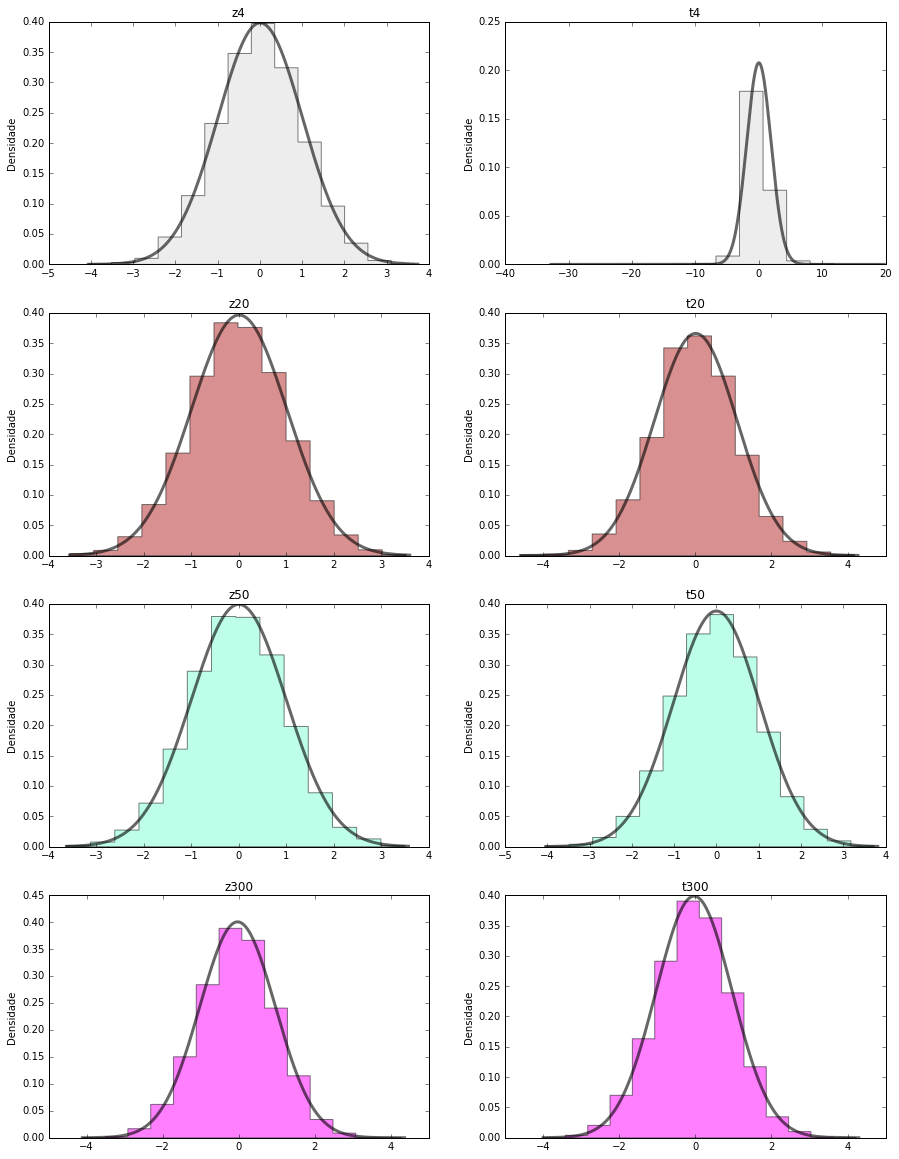

In [20]:
f, axs = plt.subplots(4, 2, figsize = (15, 20))
axs = axs.ravel()

zt, f, c, m, dp, t = ([dfz4, dft4, dfz20, dft20, dfz50, dft50, dfz300, dft300],[fz4, ft4, fz20, ft20, fz50, ft50, fz300, ft300],
                     ['gainsboro', 'gainsboro', 'firebrick', 'firebrick', 'aquamarine', 'aquamarine', 'fuchsia', 'fuchsia'],
                     [mz4, mt4, mz20, mt20, mz50, mt50, mz300, mt300], [dpz4, dpt4, dpz20, dpt20, dpz50, dpt50, dpz300, dpt300],
                     ['z4', 't4', 'z20', 't20', 'z50', 't50', 'z300', 't300'])

for i in range(len(zt)):
    axs[i].hist(zt[i], bins = f[i], alpha = 0.5, color = c[i], normed = 1, histtype = 'stepfilled')
    axs[i].plot(zt[i], stats.norm.pdf(zt[i], loc = m[i], scale = dp[i]), lw = 3, alpha = 0.6, color = 'black')
    axs[i].set_title(t[i])
    axs[i].set_ylabel('Densidade')

Para uma amostra aleatória (X1,...,Xn) que tem uma distribuição Normal com média $\mu$ e variância $\sigma ^2$, possui a distribuição de  $\frac{\bar{X}-\mu}{\sigma\hspace{1mm}/\sqrt{n}}$ ~N(0,1) quando n tende ao infinito. Podemos perceber isso nos gráficos, pois estes seguem uma distribuição normal exata para todos os valores de n.

Uma amostra aleatória (X1,...,Xn) que tem uma distribuição Normal com média $\mu$ e variância $\sigma ^2$, possui a distribuição de $\frac{\bar{X}-\mu}{S\hspace{1mm}/\sqrt{n}}$ ~t(n-1), sendo S o desvio padrão amostral da sequência (X1,...,Xn). Podemos perceber isso nos gráficos, pois estes seguem a distribuição t-Student com n-1 graus de liberdade, só não ficando bem visível para n=4 devido ao pequeno tamanho da amostra.